In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
import seaborn as sn
import pandas as pd
import numpy as np
import imp
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

sn.set_context('talk')

# Plotting grazers and scrapers versus coefficient of variation

One of the interesting patterns in the ECOREG analysis is the relationship between the proportion of grazers and scrapers and the coefficient of variation (CV). This notebook produces some plots to aid interpretation (see e-mail from Susi received 17/10/2017 at 12.35).

In [2]:
# Read basic datasets

# Hydro indicators
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\hydro_indic.xlsx'
hi_df = pd.read_excel(in_xls, sheetname='hydro_indic', index_col=0)
hi_df = hi_df.query('(eco_dataset == "pb") and (time_per == 3)')

# Site props
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\site_props.xlsx'
site_df = pd.read_excel(in_xls, sheetname='site_props', index_col=0)

# MZB
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\mzb_chem_ecol.xlsx'
mzb_df = pd.read_excel(in_xls, sheetname='mzb_data', index_col=0)

# PB
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\pb_chem_ecol.xlsx'
pb_df = pd.read_excel(in_xls, sheetname='pb_data', index_col=0)

In [3]:
# Added 27/07/2017
# Daniel recommends removing German site 107002711
# from the analysis (see e-mail from Susi received 30/05/2017 at 11.20)
hi_df = hi_df[hi_df.index != 107002711]
site_df = site_df[site_df.index != 107002711]
mzb_df = mzb_df[mzb_df.index != 107002711]
pb_df = pb_df[pb_df.index != 107002711]

In [5]:
# Import custom functions
func_path = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Python\ECOREG\final_analysis\ecoreg_code.py'

ecoreg = imp.load_source('ecoreg_code', func_path)

In [8]:
# Plot 
cols = ['graz_scrap', 'country', 'cv', 'regulated']
df = pd.concat([site_df, mzb_df, hi_df], axis=1)[cols]
df.head()

,graz_scrap,country,cv,regulated
107000582,22.009,D,0.571753,1
107000628,27.599,D,1.135739,0
107000671,38.273,D,1.774661,0
107001160,73.142,D,1.316239,0
107001168,49.758,D,1.113433,1


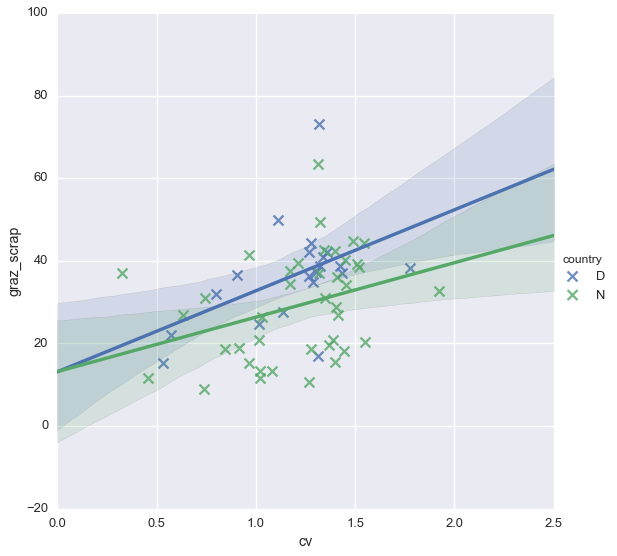

In [30]:
sn.lmplot(x='cv', y='graz_scrap', hue='country', data=df, 
          ci=95, size=8, markers='x',
          scatter_kws={'s': 100})

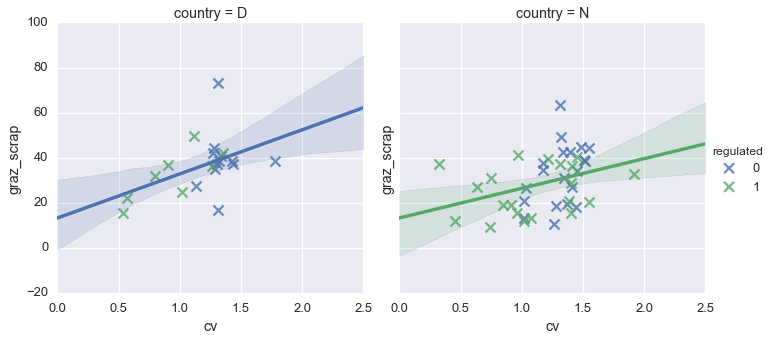

In [27]:
ger_df = df.query('country == "D"')
nor_df = df.query('country == "N"')

g = sn.lmplot(x='cv', y='graz_scrap', hue='regulated', data=df, 
              fit_reg=False, markers='x', col='country',
              scatter_kws={'s': 100})

sn.regplot(x='cv', y='graz_scrap', data=ger_df, scatter=False, ax=g.axes[0,0])
sn.regplot(x='cv', y='graz_scrap', data=nor_df, scatter=False, ax=g.axes[0,1])

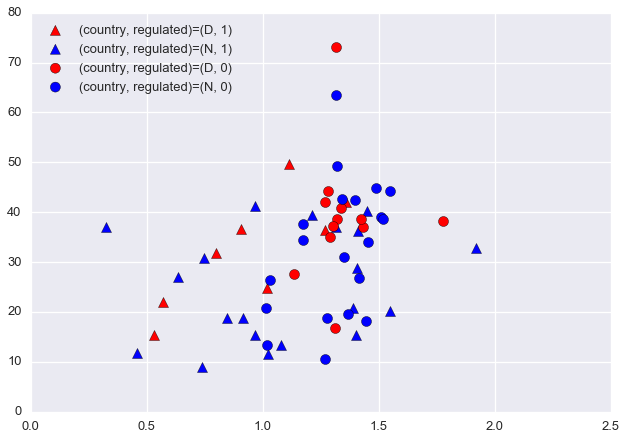

In [29]:
colors = {'D': 'red', 'N': 'blue'}
markers = ['o', '^']
for reg in df.regulated.unique():
    for cnt in df.country.unique():
        df2 = df[(df.regulated == reg) & (df.country == cnt)]
        plt.scatter(df2.cv, df2.graz_scrap, s=100, c=colors[cnt], 
                    marker=markers[reg], 
                    label='(country, regulated)=(%s, %s)' % (cnt, reg))

plt.legend(loc='upper left')